# Randomly select splits to keep in the model

In [1]:
import torch
from sandbox import SimpleModel, toy_data, experiment_series, eval_series
from pathlib import Path

In [2]:
model_params = (1, 1, 8, 2, 2)

eps = 1e-4
num_kept_neurons = 2
lr=0.005
runs=10

#0: loss: 0.18350036442279816 - size: 209
#1: loss: 0.17791613936424255 - size: 209
#2: loss: 0.17954261600971222 - size: 209
#3: loss: 0.04754222556948662 - size: 209
#4: loss: 0.04315263777971268 - size: 209
#5: loss: 0.18288959562778473 - size: 209
#6: loss: 0.19021111726760864 - size: 209
#7: loss: 0.1839749664068222 - size: 209
#8: loss: 0.043215055018663406 - size: 209
#9: loss: 0.07795939594507217 - size: 209


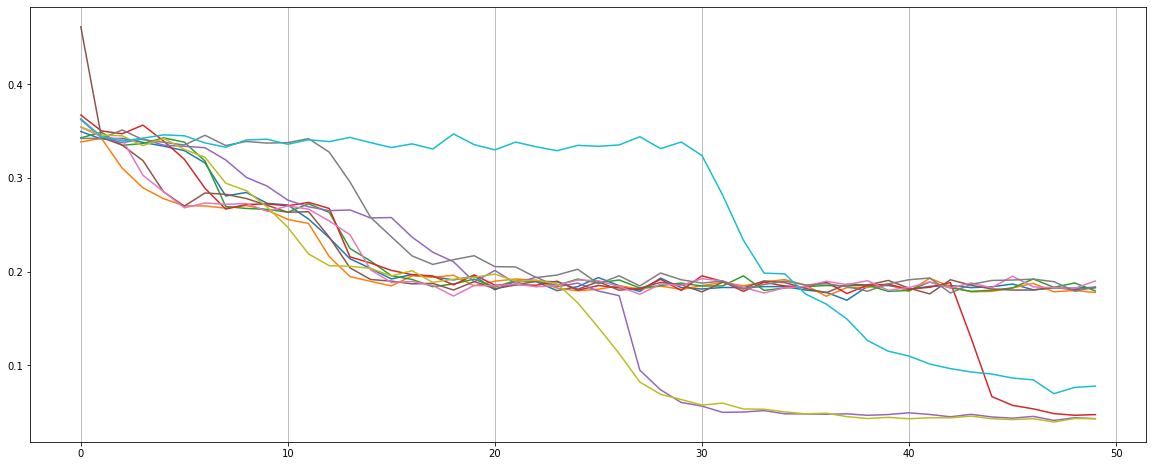

In [3]:
def grow(model):
    new_neurons = model.grow(num_novel=4, eps_novel=eps, eps_split=eps)

    selected = [torch.randperm(n)[:num_kept_neurons] for n in new_neurons]

    model.degrow(*selected)

series = experiment_series(model_params, runs=runs, grow=grow, lr=lr)

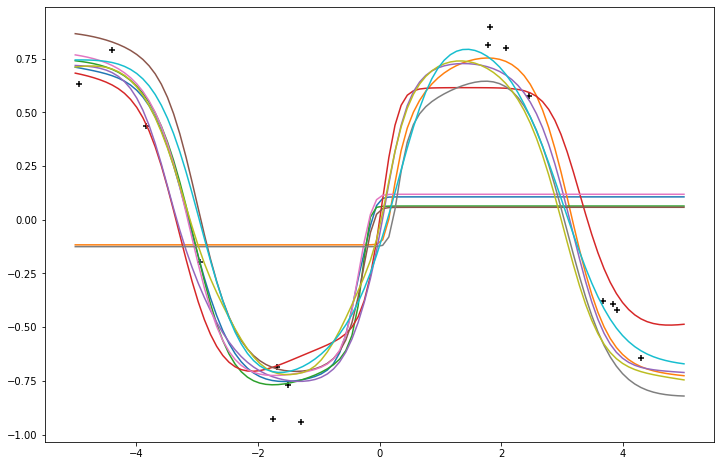

In [4]:
eval_series(series)

In [5]:
d = Path("results")
d.mkdir(parents=True, exist_ok=True)

torch.save(series, d / 'random_growth.pt')